In [90]:
import numpy as np 
import pandas as pd 

# ****Train model on English****

**Install Transformer**

In [91]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  # Show all columns
df = pd.read_csv('/kaggle/input/english-preprocessed1/english_preprocessed (1).csv')
print(df.head())

                                                                                                                                                                                                                                        text  \
0                                                    if you made it through this were not only able to start making money for yourself but sustain living that way all from home fuck these company corporate pig power to the people always   
1                                                                                                                                                                                 technically that is still turning back the clock dick head   
2  and you are the govt stop thinking about world medium liberal gang or any optic whatsoever and act now already if this is what a person at your level is facing then shudder to think the plight of common people in bengal bengalburning   
3                                       

In [92]:
# install transformers
!pip install "transformers ==4.33.1"
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached transformers-4.33.1-py3-none-any.whl.metadata (119 kB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.33.1-py3-none-any.whl (7.6 MB)
Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.1
    Uninstalling transformers-4.40.1:
      Successfully uninstalled transformers-4.40.1


In [93]:
pip install --upgrade transformers


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached transformers-4.40.1-py3-none-any.whl.metadata (137 kB)
  Using cached tokenizers-0.19.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.40.1-py3-none-any.whl (9.0 MB)
Using cached tokenizers-0.19.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.33.1
    Uninstalling transformers-4.33.1:
      Successfully uninstalled transformers-4.33.1
Note: you may need to restart the kernel to use updated packages.


In [94]:
# load tokens
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

In [95]:
# print first text
df.text.values[0]

'if you made it through this were not only able to start making money for yourself but sustain living that way all from home fuck these company corporate pig power to the people always'

In [96]:
#Print tokens of first text
print({x : tokenizer.encode(x, add_special_tokens=False) for x in df.text.values[0].split()})

{'if': [2174], 'you': [398], 'made': [7228], 'it': [442], 'through': [8305], 'this': [903], 'were': [3542], 'not': [959], 'only': [4734], 'able': [19048], 'to': [47], 'start': [4034], 'making': [20662], 'money': [17265], 'for': [100], 'yourself': [31949], 'but': [1284], 'sustain': [205027], 'living': [38043], 'that': [450], 'way': [3917], 'all': [756], 'from': [1295], 'home': [5368], 'fuck': [40878], 'these': [6097], 'company': [14380], 'corporate': [145781], 'pig': [53408], 'power': [14537], 'the': [70], 'people': [3395], 'always': [11343]}


In [97]:
#drop null values
df = df.dropna()

In [98]:
import pandas as pd

# Assuming you have loaded your DataFrame df
# You can replace df with the name of your DataFrame

# Count the number of rows where the label is 1
num_label_1 = (df['label'] == 1).sum()

# Count the number of rows where the label is 0
num_label_0 = (df['label'] == 0).sum()

print("Number of rows where label is 1:", num_label_1)
print("Number of rows where label is 0:", num_label_0)




Number of rows where label is 1: 4051
Number of rows where label is 0: 4635


**Tried with balanced dataset by downsampling**

In [99]:


# # Determine the difference between the counts of label 0 and label 1
# difference = abs(num_label_0 - num_label_1)

# # Remove extra rows with the majority label until both labels have an equal number of rows
# if num_label_0 > num_label_1:
#     # Remove extra rows with label 0
#     df = df.drop(df[df['label'] == 0].index[:difference])
# elif num_label_1 > num_label_0:
#     # Remove extra rows with label 1
#     df = df.drop(df[df['label'] == 1].index[:difference])

# # Now both labels have an equal number of rows
# # You can use df for further analysis or processing


In [100]:
df.shape

(8686, 2)

**Finding Max length of tokenized sentence**

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


max:  116
min:  3


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500')])

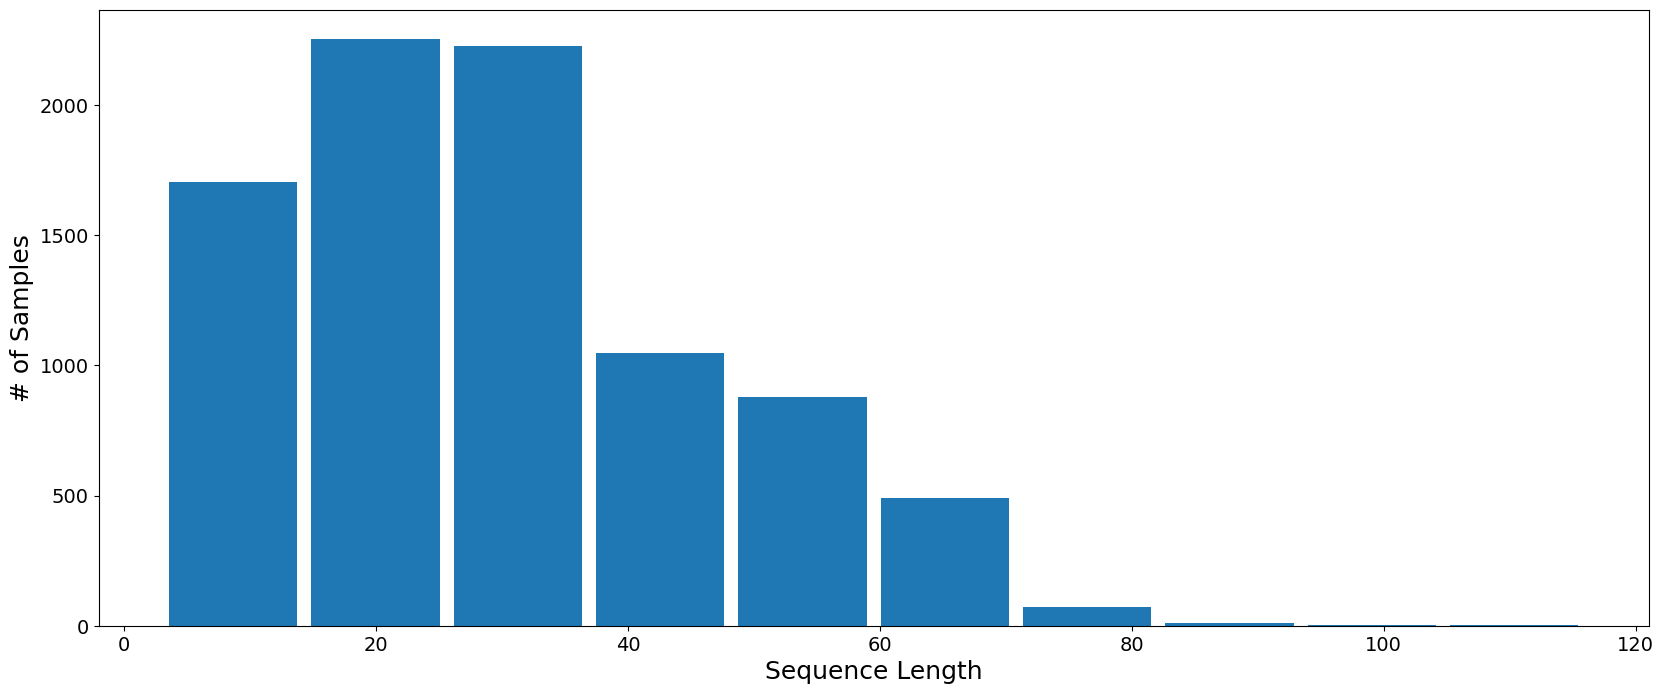

In [101]:
# install matplotlib
!pip install matplotlib
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            df.text.values.tolist(),
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

**Identify Features and target**

In [102]:
# identify features and target
features = df.text.values.tolist()
target = df.label.values.tolist()

**Tokenize Features**

In [103]:
# tokenize features
MAX_LEN = 116
tokenized_feature = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            features,
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True,
                            # Add empty tokens if len(text)<MAX_LEN
                            padding = 'max_length',
                            # Truncate all sentences to max length
                            truncation=True,
                            # Set the maximum length
                            max_length = MAX_LEN,
                            # Return attention mask
                            return_attention_mask = True,
                            # Return pytorch tensors
                            return_tensors = 'pt'
                   )

In [104]:
print(tokenized_feature)

{'input_ids': tensor([[     0,   2174,    398,  ...,      1,      1,      1],
        [     0, 121392,    538,  ...,      1,      1,      1],
        [     0,    136,    398,  ...,      1,      1,      1],
        ...,
        [     0,  88669,    111,  ...,      1,      1,      1],
        [     0,     70,  67915,  ...,      1,      1,      1],
        [     0,  17723, 101207,  ...,      1,      1,      1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


**Train Test Split**

In [105]:
from sklearn.model_selection import train_test_split

# First, split the data into training and the rest
train_inputs, rest_inputs, train_labels, rest_labels, train_masks, rest_masks = train_test_split(tokenized_feature['input_ids'],
                                                                                                target,
                                                                                                tokenized_feature['attention_mask'],
                                                                                                random_state=500,
                                                                                                test_size=0.2,
                                                                                                stratify=target)

# Then, split the rest into validation and testing
validation_inputs, test_inputs, validation_labels, test_labels, validation_masks, test_masks = train_test_split(rest_inputs,
                                                                                                                  rest_labels,
                                                                                                                  rest_masks,
                                                                                                                  random_state=500,
                                                                                                                  test_size=0.5,
                                                                                                                stratify=rest_labels)
                               

In [106]:
len(validation_inputs)

869

In [107]:
len(train_inputs)

6948

**Create Dataloaders**

In [108]:
# define batch_size
batch_size = 32
# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, torch.tensor(train_labels))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# Create the DataLoader for our validation set
validation_data = TensorDataset(validation_inputs, validation_masks, torch.tensor(validation_labels))
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)
# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, torch.tensor(test_labels))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


**Define XMLR Pretrained model with custom classification head**

In [109]:
import torch
from transformers import XLMRobertaModel
from torch import nn

class CustomXLMRobertaForClassification(nn.Module):
    def __init__(self, num_labels):
        super(CustomXLMRobertaForClassification, self).__init__()
        self.num_labels = num_labels 
        self.roberta = XLMRobertaModel.from_pretrained("xlm-roberta-base")
        self.classifier = CustomRobertaClassificationHead(input_size=self.roberta.config.hidden_size, hidden_size=768, num_labels=num_labels)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        logits = self.classifier(pooled_output)
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            return loss,logits
        else:
            return logits
       



In [110]:
class CustomRobertaClassificationHead(nn.Module):
    def __init__(self, input_size, hidden_size, num_labels):
        super(CustomRobertaClassificationHead, self).__init__()
        self.dense = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(0.1)
        self.additional_linear = nn.Linear(768, 768)
        self.out_proj = nn.Linear(hidden_size, num_labels)

    def forward(self, x):
        x = self.dropout(x)
        batch_size = x.size(0)
        x = x.view(-1, x.size(-1))
        x = nn.functional.relu(self.dense(x))
        x = self.dropout(x)
        x = x.view(batch_size, -1, 768)
        x = nn.functional.relu(self.additional_linear(x))
        x = self.dropout(x)
        x = x.mean(dim=1)
        x = self.out_proj(x)
        return x

# Create an instance of the custom model
# model = CustomXLMRobertaForClassification(num_labels=len(set(target)))
model = CustomXLMRobertaForClassification(num_labels=2)



In [111]:
model

CustomXLMRobertaForClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, b

**Define Optimizer**

In [112]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [113]:
# Optimizer 
optimizer = AdamW(model.parameters(),
                  lr = 1e-5,
                  eps = 1e-8,
                  weight_decay=0.01
                )

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


**Define Scheduler and epochs**

In [114]:
# Number of training epochs
epochs = 5
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 10,
                                            num_training_steps = total_steps)

In [115]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Using GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('Using CPU')


Using GPU: Tesla P100-PCIE-16GB


In [116]:
#move model to device
model.to(device)

CustomXLMRobertaForClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, b

In [117]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


In [118]:

import random

seed_val = 111

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

**Training and Validation Phase**

In [119]:
from sklearn.metrics import classification_report

train_losses= []
val_losses=[]

for n in range(epochs):
    # List to store predictions and ground truth labels for both training and validation sets
    train_preds = []
    train_labels_all = []
    val_preds = []
    val_labels_all = []

    train_loss = 0
    val_loss = 0
    start_time = time.time()
    
    # Calculate number of mini-batches for training and validation sets
    num_mb_train = len(train_dataloader)
    num_mb_val = len(validation_dataloader)

    # Training phase
    for k, (mb_x, mb_m, mb_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        model.train()

        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)

        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        loss = outputs[0]
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        train_loss += loss.data / num_mb_train

        # Append predictions and labels
        train_preds += torch.argmax(outputs[1], dim=1).cpu().tolist()
        train_labels_all += mb_y.cpu().tolist()

    # Validation phase
    with torch.no_grad():
        model.eval()

        for k, (mb_x, mb_m, mb_y) in enumerate(validation_dataloader):
            mb_x = mb_x.to(device)
            mb_m = mb_m.to(device)
            mb_y = mb_y.to(device)

            outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
            loss = outputs[0]
            val_loss += loss.data / num_mb_val

            # Append predictions and labels
            val_preds += torch.argmax(outputs[1], dim=1).cpu().tolist()
            val_labels_all += mb_y.cpu().tolist()

    # Compute metrics
    train_report = classification_report(train_labels_all, train_preds, target_names=['NOT', 'HOF'])
    val_report = classification_report(val_labels_all, val_preds, target_names=['NOT', 'HOF'])

    print(f'Training report after iteration {n+1}:\n{train_report}')
    print(f'Validation report after iteration {n+1}:\n{val_report}')

    train_losses.append(train_loss.cpu())
    val_losses.append(val_loss.cpu())

    end_time = time.time()
    epoch_mins, epoch_secs = divmod(end_time - start_time, 60)
    print(f'Time: {epoch_mins}m {epoch_secs}s')


Training report after iteration 1:
              precision    recall  f1-score   support

         NOT       0.64      0.84      0.72      3708
         HOF       0.71      0.45      0.55      3240

    accuracy                           0.66      6948
   macro avg       0.67      0.65      0.64      6948
weighted avg       0.67      0.66      0.64      6948

Validation report after iteration 1:
              precision    recall  f1-score   support

         NOT       0.76      0.87      0.81       463
         HOF       0.82      0.69      0.75       406

    accuracy                           0.79       869
   macro avg       0.79      0.78      0.78       869
weighted avg       0.79      0.79      0.78       869

Time: 1.0m 24.562946796417236s
Training report after iteration 2:
              precision    recall  f1-score   support

         NOT       0.83      0.81      0.82      3708
         HOF       0.79      0.81      0.80      3240

    accuracy                           0.81 

In [120]:
print(train_losses)

[tensor(0.6131), tensor(0.4636), tensor(0.3886), tensor(0.3591), tensor(0.3223)]


In [121]:
print(val_losses)

[tensor(0.5097), tensor(0.3896), tensor(0.3840), tensor(0.3989), tensor(0.3821)]


**Test Phase**

In [122]:
# Testing 
model.eval()
test_preds = []
test_labels_all = []

with torch.no_grad():
    for mb_x, mb_m, mb_y in test_dataloader:
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)

        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        test_preds += torch.argmax(outputs[1], dim=1).cpu().tolist()
        test_labels_all += mb_y.cpu().tolist()

# Compute and print classification report for testing
test_report = classification_report(test_labels_all, test_preds, target_names=['NOT', 'HOF'])
print(f'Testing report:\n{test_report}')

Testing report:
              precision    recall  f1-score   support

         NOT       0.84      0.89      0.87       464
         HOF       0.87      0.81      0.84       405

    accuracy                           0.85       869
   macro avg       0.85      0.85      0.85       869
weighted avg       0.85      0.85      0.85       869



**Confusion matrix for Test Data**

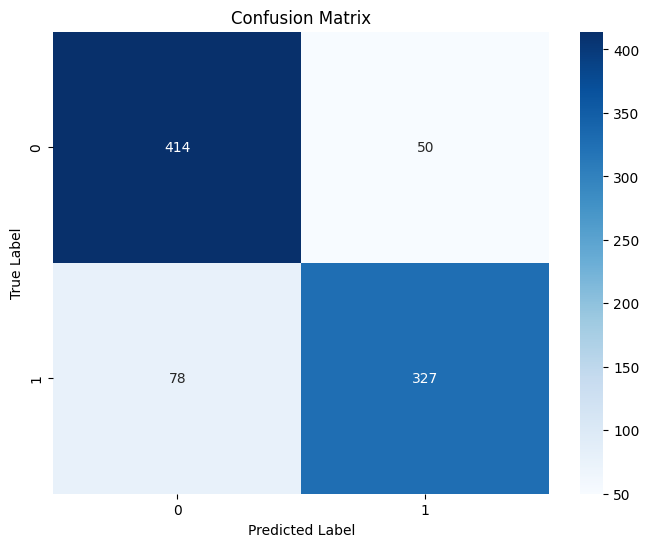

In [123]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(test_labels_all, test_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [124]:
model

CustomXLMRobertaForClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, b

# Testing on given input

In [125]:

# Define your input sentence
sentence = "What the hell with central vista ResignModi"
# Tokenize input sentence
encoding = tokenizer(sentence, return_tensors="pt")

# Move input tensors to the same device as the model
encoding = {k: v.to(device) for k, v in encoding.items()}

# Perform inference
with torch.no_grad():
    outputs = model(**encoding)

# Get predicted logits
logits = outputs[0]

# Get predicted class index (index with the highest probability)
predicted_class_index = logits.argmax(-1).item()

# Print predicted class index
print("Predicted class index:", predicted_class_index)

Predicted class index: 0


**save model**

In [126]:
# Save model state dict
torch.save(model.state_dict(), 'custom_model.pth')

# **Transfer learning**

In [127]:
num_labels=2
# Load model state dict
model = CustomXLMRobertaForClassification(num_labels)
model.load_state_dict(torch.load('/kaggle/working/custom_model.pth')) #here you can add path of model from where you want to load

<All keys matched successfully>

In [128]:
model

CustomXLMRobertaForClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, b

In [129]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Using GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('Using CPU')

Using GPU: Tesla P100-PCIE-16GB


In [130]:
model.to(device)

CustomXLMRobertaForClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, b

**Import test dataset**

In [131]:
import pandas as pd
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  # Show all columns
df2 = pd.read_csv('/kaggle/input/hindi-preprocessed/hindi_preprocessed_2.csv')
print(df2.head())

                                                                                                                                                       text  \
0                                                          dying        liars i warned  yrs back  banned by sardar patel ignored ेरनहींभेड़ियापाललियाभक्तो    
1  सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम आदमी को सिलेंडर और कन्सेंट्रेटर ख़ुद से ही ख़रीदना पड़ रहा है  तो पैसे कहाँ जा रहे हैं बीयर्ड ऑयल में       
2                                                                                 शेरए सिवान शहाबुद्दीन साहब से रिश्ता क्या لا إله إلا الله محمد رسول الله    
3                                                                                                                            आसमानी किताब के नाजायज औलाद है   
4                              इसे कहते हैं दोगला पंती जिस सपा की दम पर  से  का सफर किया और माया अपनी इज्ज़त बचा पाई आज उसी सपा को मिटाने की बात कर रही हैं   

   task_1  
0       1  
1       1  
2       1

In [132]:
df2.rename(columns={'text': 'tweet', 'task_1': 'label'}, inplace=True)

In [133]:
# load tokens
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

In [134]:
#Print tokens of first text
print({x : tokenizer.encode(x, add_special_tokens=False) for x in df2.tweet.values[0].split()})

{'dying': [2160, 214], 'liars': [400, 21816], 'i': [17], 'warned': [1631, 14534], 'yrs': [2938, 7], 'back': [4420], 'banned': [4599, 14534], 'by': [390], 'sardar': [10649, 1506], 'patel': [249, 1708], 'ignored': [124962, 71], 'ेरनहींभेड़ियापाललियाभक्तो': [6, 7875, 998, 3054, 838, 65758, 12372, 11635, 41590, 105755, 146677, 2284]}


In [135]:
#drop null values
df2 = df2.dropna()

**train test split**

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split df2 into training and testing sets (where training contains only 20%)
train_df2, test_df2 = train_test_split(df2, test_size=0.9, random_state=42)


**initialize features and target**

In [137]:
# identify features and target
features = test_df2.tweet.values.tolist()
target = test_df2.label.values.tolist()

**Finding Max length of tokenized sentence**

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


max:  355
min:  3


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500')])

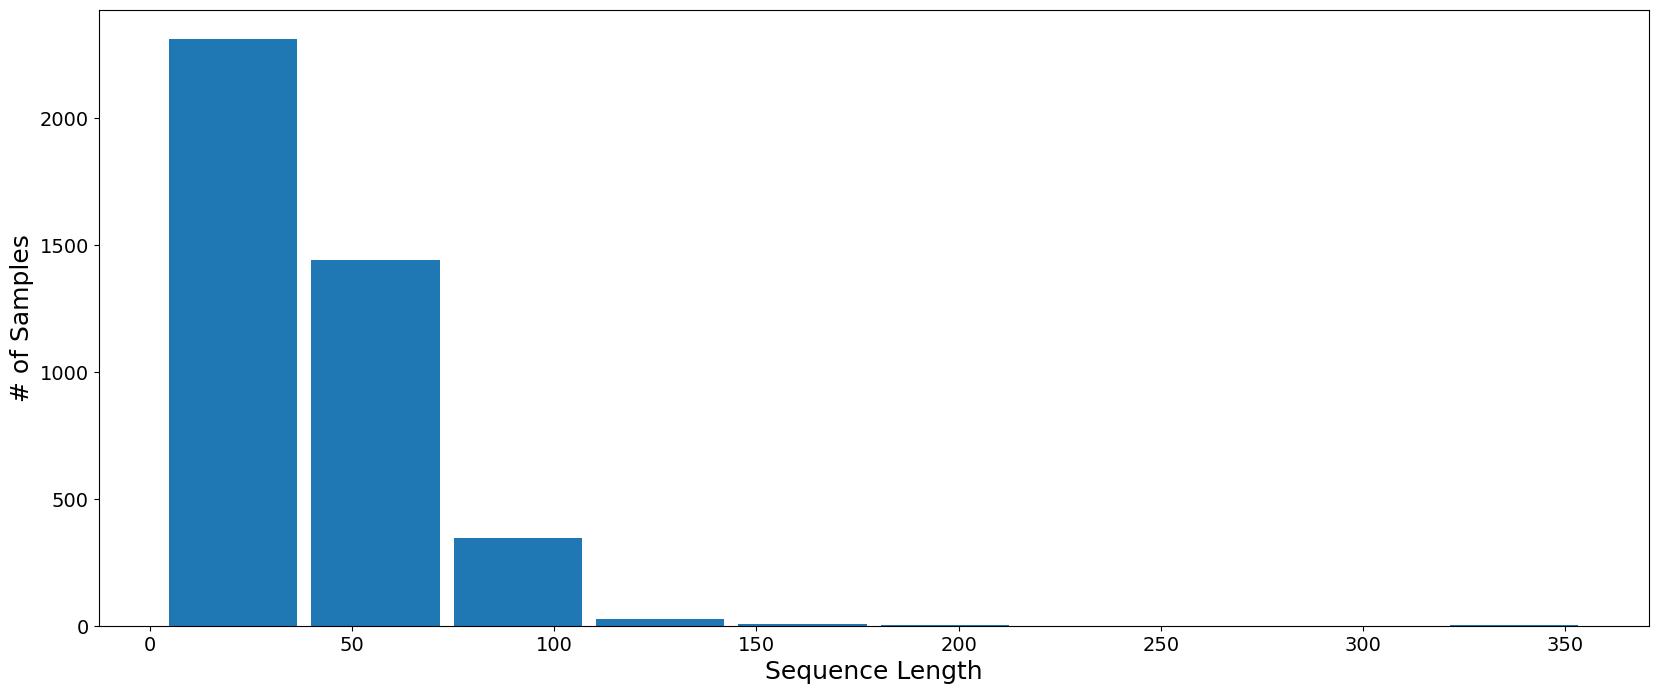

In [138]:
# install matplotlib
!pip install matplotlib
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            features,
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

**Tokenize features**

In [139]:
# tokenize features
MAX_LEN = 100
tokenized_feature = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            features,
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True,
                            # Add empty tokens if len(text)<MAX_LEN
                            padding = 'max_length',
                            # Truncate all sentences to max length
                            truncation=True,
                            # Set the maximum length
                            max_length = MAX_LEN,
                            # Return attention mask
                            return_attention_mask = True,
                            # Return pytorch tensors
                            return_tensors = 'pt'
                   )

In [140]:
tokenized_feature['input_ids'].shape

torch.Size([4135, 100])

In [141]:
tokenized_feature['attention_mask']

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [142]:
# install transformers
!pip install "transformers ==4.33.1"
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached transformers-4.33.1-py3-none-any.whl.metadata (119 kB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.33.1-py3-none-any.whl (7.6 MB)
Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.1
    Uninstalling transformers-4.40.1:
      Successfully uninstalled transformers-4.40.1


**Create test Dataloader**

In [143]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

# Assuming features and target are your tokenized features and target
features = tokenized_feature['input_ids']
masks = tokenized_feature['attention_mask']
target = target

# Convert features and target to tensors
features_tensor = torch.tensor(features)
masks_tensor = torch.tensor(masks)
target_tensor = torch.tensor(target)

# Create TensorDataset
test_data = TensorDataset(features_tensor, masks_tensor, target_tensor)

# Define batch size
batch_size = 16

# Create DataLoader with RandomSampler
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


/tmp/ipykernel_34/3427101683.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_tensor = torch.tensor(features)
/tmp/ipykernel_34/3427101683.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  masks_tensor = torch.tensor(masks)


**Testing**

In [144]:
from sklearn.metrics import classification_report

# Testing 
model.eval()
test_preds = []
test_labels_all = []

with torch.no_grad():
    for mb_x, mb_m, mb_y in test_dataloader:
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)

        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        test_preds += torch.argmax(outputs[1], dim=1).cpu().tolist()
        test_labels_all += mb_y.cpu().tolist()

# Compute and print classification report for testing
test_report = classification_report(test_labels_all, test_preds, target_names=['hate', 'non-hate']) #0 for hate
print(f'Testing report:\n{test_report}')

Testing report:
              precision    recall  f1-score   support

        hate       0.63      0.51      0.56      1306
    non-hate       0.79      0.86      0.83      2829

    accuracy                           0.75      4135
   macro avg       0.71      0.69      0.70      4135
weighted avg       0.74      0.75      0.74      4135



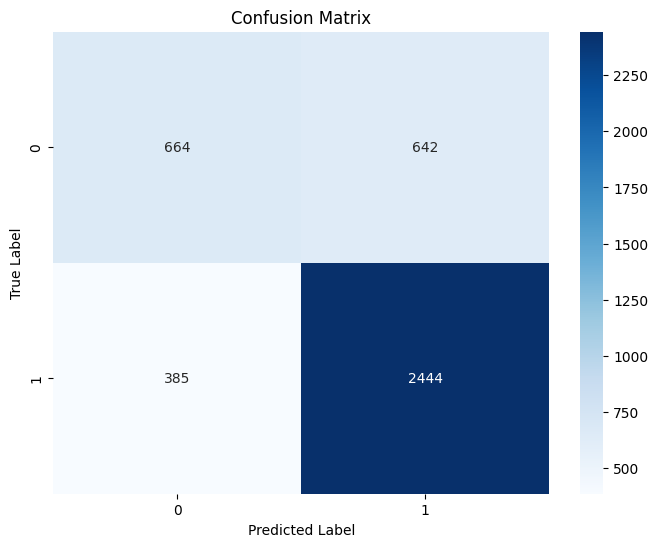

In [145]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(test_labels_all, test_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Testing on provided input

In [146]:

# Define your input sentence
sentence = "झूठा है इसकी पार्टी ने देश को लूटा हैा"
# Tokenize input sentence
encoding = tokenizer(sentence, return_tensors="pt")

# Move input tensors to the same device as the model
encoding = {k: v.to(device) for k, v in encoding.items()}

# Perform inference
with torch.no_grad():
    outputs = model(**encoding)

# Get predicted logits
logits = outputs[0]

# Get predicted class index (index with the highest probability)
predicted_class_index = logits.argmax(-1).item()

# Print predicted class index
print("Predicted class index:", predicted_class_index)

Predicted class index: 0


# Transfer learning with combined data(English + few samples of Hindi)

In [147]:
num_labels=2
# Load model state dict
model = CustomXLMRobertaForClassification(num_labels)
model.load_state_dict(torch.load('/kaggle/working/custom_model.pth')) #here you can add path of model from where you want to load

<All keys matched successfully>

**Combining Training Data**

In [148]:
df.head()

,text,label
0,if you made it through this were not only able to start making money for yourself but sustain living that way all from home fuck these company corporate pig power to the people always,0
1,technically that is still turning back the clock dick head,0
2,and you are the govt stop thinking about world medium liberal gang or any optic whatsoever and act now already if this is what a person at your level is facing then shudder to think the plight of common people in bengal bengalburning,1
3,soldier of japan who ha dick head,0
4,you would be better off asking who doe not think he is a sleazy shitbag lmao,0


In [149]:
df2.head()

,tweet,label
0,dying liars i warned yrs back banned by sardar patel ignored ेरनहींभेड़ियापाललियाभक्तो,1
1,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम आदमी को सिलेंडर और कन्सेंट्रेटर ख़ुद से ही ख़रीदना पड़ रहा है तो पैसे कहाँ जा रहे हैं बीयर्ड ऑयल में,1
2,शेरए सिवान शहाबुद्दीन साहब से रिश्ता क्या لا إله إلا الله محمد رسول الله,1
3,आसमानी किताब के नाजायज औलाद है,0
4,इसे कहते हैं दोगला पंती जिस सपा की दम पर से का सफर किया और माया अपनी इज्ज़त बचा पाई आज उसी सपा को मिटाने की बात कर रही हैं,1


In [150]:
df2.rename(columns={'tweet': 'text'}, inplace=True)

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split df2 into training and testing sets (where training contains only 20%)
train_df2, test_df2 = train_test_split(df2, test_size=0.9, random_state=42)

# Combine training data from df2 with df1
combined_df = pd.concat([df, train_df2], ignore_index=True)

# If you want to reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)


**Hindi samples**

In [152]:
train_df2.shape

(459, 2)

In [153]:
#Print tokens of first text
print({x : tokenizer.encode(x, add_special_tokens=False) for x in combined_df.text.values[0].split()})

{'if': [2174], 'you': [398], 'made': [7228], 'it': [442], 'through': [8305], 'this': [903], 'were': [3542], 'not': [959], 'only': [4734], 'able': [19048], 'to': [47], 'start': [4034], 'making': [20662], 'money': [17265], 'for': [100], 'yourself': [31949], 'but': [1284], 'sustain': [205027], 'living': [38043], 'that': [450], 'way': [3917], 'all': [756], 'from': [1295], 'home': [5368], 'fuck': [40878], 'these': [6097], 'company': [14380], 'corporate': [145781], 'pig': [53408], 'power': [14537], 'the': [70], 'people': [3395], 'always': [11343]}


In [154]:
#drop null values
combined_df = combined_df.dropna()

**Finding Max length of tokenized sentence**

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


max:  143
min:  3


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500')])

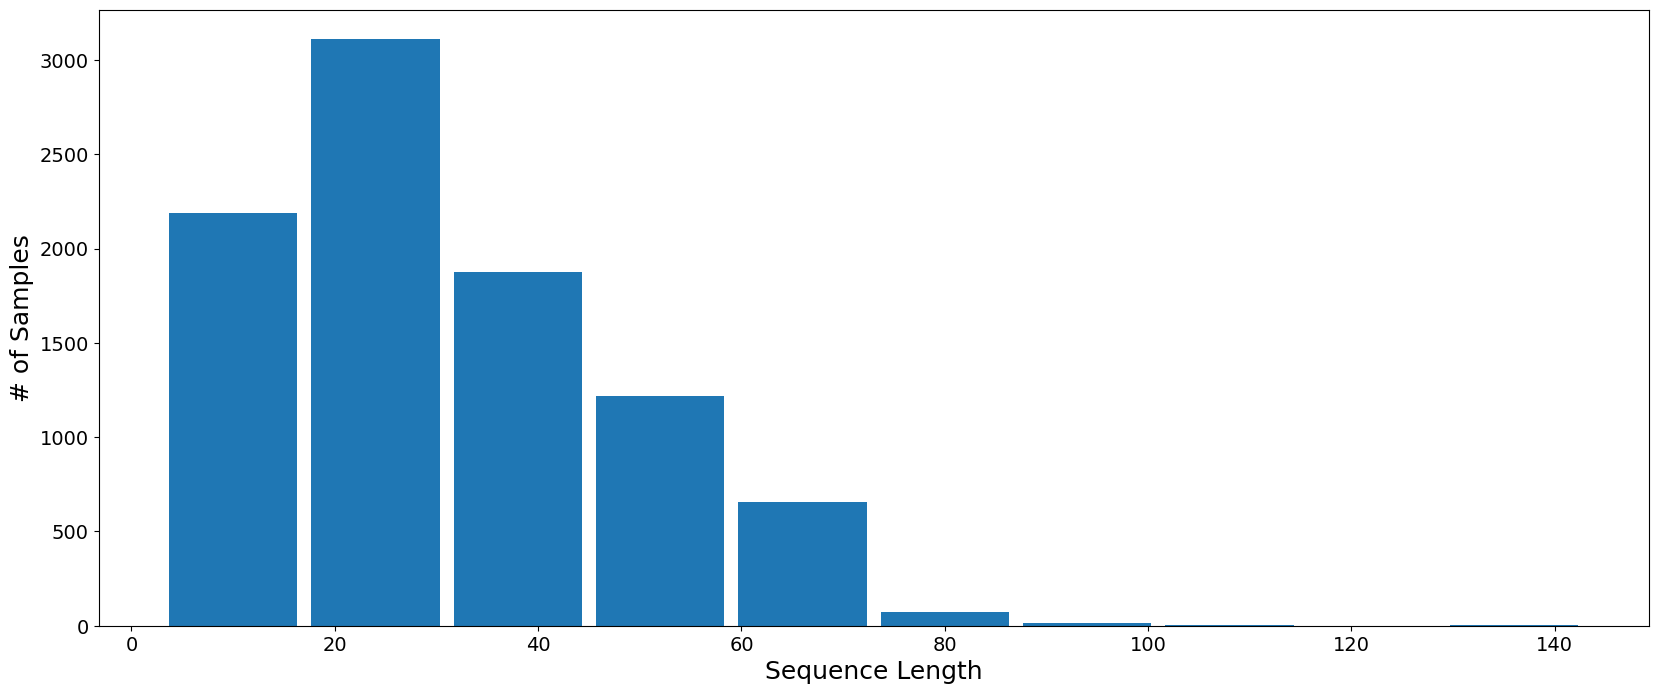

In [155]:
# install matplotlib
!pip install matplotlib
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            combined_df.text.values.tolist(),
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

**initializing features and target**

In [156]:
# identify features and target
features = combined_df.text.values.tolist()
target = combined_df.label.values.tolist()

**Tokenize features**

In [157]:
# tokenize features
MAX_LEN = 120
tokenized_feature = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            features,
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True,
                            # Add empty tokens if len(text)<MAX_LEN
                            padding = 'max_length',
                            # Truncate all sentences to max length
                            truncation=True,
                            # Set the maximum length
                            max_length = MAX_LEN,
                            # Return attention mask
                            return_attention_mask = True,
                            # Return pytorch tensors
                            return_tensors = 'pt'
                   )

**Creating training dataloader**

In [158]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

# Assuming features and target are your tokenized features and target
features = tokenized_feature['input_ids']
masks = tokenized_feature['attention_mask']
target = target

# Convert features and target to tensors
features_tensor = torch.tensor(features)
masks_tensor = torch.tensor(masks)
target_tensor = torch.tensor(target)

# Create TensorDataset
train_data = TensorDataset(features_tensor, masks_tensor, target_tensor)

# Define batch size
batch_size = 16

# Create DataLoader with RandomSampler
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)


/tmp/ipykernel_34/3973384172.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_tensor = torch.tensor(features)
/tmp/ipykernel_34/3973384172.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  masks_tensor = torch.tensor(masks)


**Defining optimizer**

In [159]:
# Optimizer 
optimizer = AdamW(model.parameters(),
                  lr = 1e-5,
                  eps = 1e-8,
                  weight_decay=0.01
                )

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


**Defining scheduler and epochs**

In [160]:
# Number of training epochs
epochs = 5
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 5,
                                            num_training_steps = total_steps)

In [161]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Using GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('Using CPU')


Using GPU: Tesla P100-PCIE-16GB


In [162]:
#move model to device
model.to(device)

CustomXLMRobertaForClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, b

**Training**

In [163]:
from sklearn.metrics import classification_report

train_losses= []

for n in range(epochs):
    # List to store predictions and ground truth labels for both training and validation sets
    train_preds = []
    train_labels_all = []

    train_loss = 0

    start_time = time.time()
    
    # Calculate number of mini-batches for training and validation sets
    num_mb_train = len(train_dataloader)


    # Training phase
    for k, (mb_x, mb_m, mb_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        model.train()

        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)

        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        loss = outputs[0]
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        train_loss += loss.data / num_mb_train

        # Append predictions and labels
        train_preds += torch.argmax(outputs[1], dim=1).cpu().tolist()
        train_labels_all += mb_y.cpu().tolist()


    # Compute metrics
    train_report = classification_report(train_labels_all, train_preds, target_names=['NOT', 'HOF'])

    print(f'Training report after iteration {n+1}:\n{train_report}')


    train_losses.append(train_loss.cpu())


    end_time = time.time()
    epoch_mins, epoch_secs = divmod(end_time - start_time, 60)
    print(f'Time: {epoch_mins}m {epoch_secs}s')


Training report after iteration 1:
              precision    recall  f1-score   support

         NOT       0.86      0.86      0.86      4762
         HOF       0.85      0.85      0.85      4383

    accuracy                           0.85      9145
   macro avg       0.85      0.85      0.85      9145
weighted avg       0.85      0.85      0.85      9145

Time: 2.0m 5.159184694290161s
Training report after iteration 2:
              precision    recall  f1-score   support

         NOT       0.88      0.88      0.88      4762
         HOF       0.87      0.87      0.87      4383

    accuracy                           0.88      9145
   macro avg       0.88      0.88      0.88      9145
weighted avg       0.88      0.88      0.88      9145

Time: 2.0m 5.101124286651611s
Training report after iteration 3:
              precision    recall  f1-score   support

         NOT       0.90      0.91      0.91      4762
         HOF       0.90      0.89      0.90      4383

    accuracy     

**Test data (Marathi)**

In [164]:
#Print tokens of first text
print({x : tokenizer.encode(x, add_special_tokens=False) for x in test_df2.text.values[0].split()})

{'के': [287], 'विधायक': [103631], 'ने': [1142], 'माना': [123647], 'कि': [1682], 'िल्ली': [6, 3558, 96246], 'में': [421], 'जनता': [27620], 'की': [471], 'दुर्दशा': [69740, 3044, 10419], 'सहूलियत': [20453, 45340, 97309], 'ना': [6754], 'मिलने': [120073], 'कारण': [6701], 'है': [460], 'तो': [2073], 'फिर': [12262], 'आप': [4322], 'सरकार': [5082], 'कर': [1896], 'क्या': [6004], 'रही': [8906]}


**Finding Max length of tokenized sentence**

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


max:  355
min:  3


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500')])

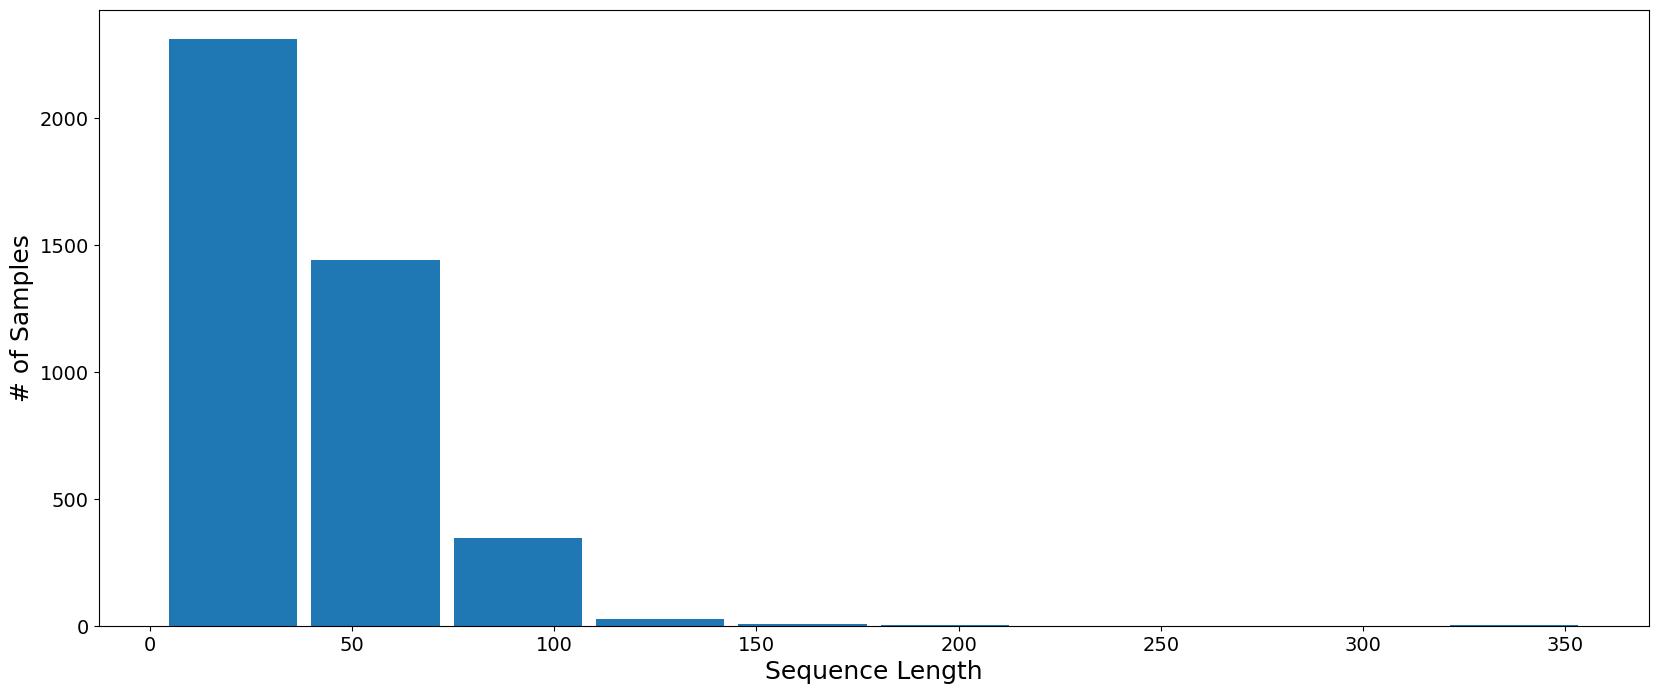

In [165]:
# install matplotlib
!pip install matplotlib
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            test_df2.text.values.tolist(),
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

**defining features and target for test data**

In [166]:
# identify features and target
features = test_df2.text.values.tolist()
target = test_df2.label.values.tolist()

**Tokenize features**

In [167]:
# tokenize features
MAX_LEN = 150
tokenized_feature = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            features,
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True,
                            # Add empty tokens if len(text)<MAX_LEN
                            padding = 'max_length',
                            # Truncate all sentences to max length
                            truncation=True,
                            # Set the maximum length
                            max_length = MAX_LEN,
                            # Return attention mask
                            return_attention_mask = True,
                            # Return pytorch tensors
                            return_tensors = 'pt'
                   )

**create test dataloader**

In [168]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

# Assuming features and target are your tokenized features and target
features = tokenized_feature['input_ids']
masks = tokenized_feature['attention_mask']
target = target

# Convert features and target to tensors
features_tensor = torch.tensor(features)
masks_tensor = torch.tensor(masks)
target_tensor = torch.tensor(target)

# Create TensorDataset
test_data = TensorDataset(features_tensor, masks_tensor, target_tensor)

# Define batch size
batch_size = 16

# Create DataLoader with RandomSampler
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


/tmp/ipykernel_34/3427101683.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_tensor = torch.tensor(features)
/tmp/ipykernel_34/3427101683.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  masks_tensor = torch.tensor(masks)


**Testing Phase**

In [169]:
# Testing 
model.eval()
test_preds = []
test_labels_all = []

with torch.no_grad():
    for mb_x, mb_m, mb_y in test_dataloader:
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)

        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        test_preds += torch.argmax(outputs[1], dim=1).cpu().tolist()
        test_labels_all += mb_y.cpu().tolist()

# Compute and print classification report for testing
test_report = classification_report(test_labels_all, test_preds, target_names=['NOT', 'HOF'])
print(f'Testing report:\n{test_report}')

Testing report:
              precision    recall  f1-score   support

         NOT       0.68      0.52      0.59      1306
         HOF       0.80      0.89      0.84      2829

    accuracy                           0.77      4135
   macro avg       0.74      0.70      0.72      4135
weighted avg       0.76      0.77      0.76      4135



**Confusion Matrix**

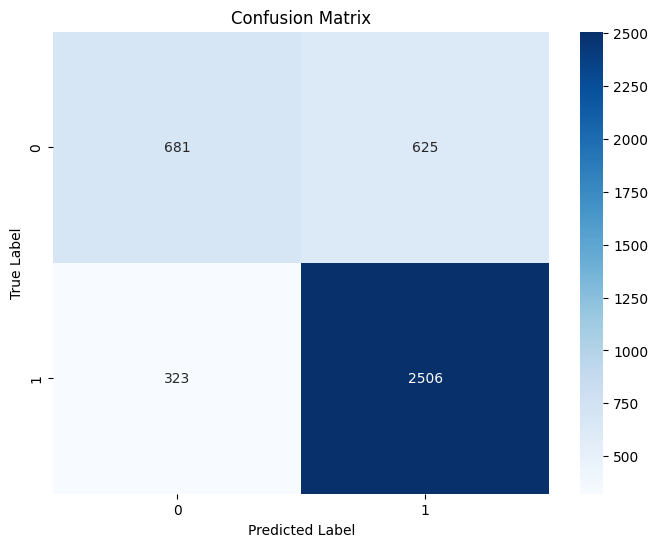

In [170]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(test_labels_all, test_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Testing on provided input

In [171]:

# Define your input sentence
sentence = "बिल्कुल सत्य ऐसे गद्दारों ने ही देश को बर्बाद कर दिया"
# Tokenize input sentence
encoding = tokenizer(sentence, return_tensors="pt")

# Move input tensors to the same device as the model
encoding = {k: v.to(device) for k, v in encoding.items()}

# Perform inference
with torch.no_grad():
    outputs = model(**encoding)

# Get predicted logits
logits = outputs[0]

# Get predicted class index (index with the highest probability)
predicted_class_index = logits.argmax(-1).item()

# Print predicted class index
print("Predicted class index:", predicted_class_index)

Predicted class index: 0
